In [42]:
from __future__ import print_function

%matplotlib inline


from time import time
import sys
import os
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import numpy as np

# Import metrics

In [43]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ALL major classifiers are imported below

##### USE ANY 2 of the below classifiers, Make sure to understand the documentation and parameters before using them

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

#### USE ANY OF THE BELOW VECTORIZERS, Again read the documentation to understand the parameters


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
#### USE EITHER GRIDSEARCHCV or RANDOMSEARCHCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

###### Use the below function for benchmarks

In [48]:
def benchmark(clf_class, params, name= 'classifier'):
    print("parameters:", params)
    t0 = time()
    clf = clf_class(**params).fit(X_train, y_train)
    print("done in %fs" % (time() - t0))

    print("Predicting the outcomes of the testing set")
    t0 = time()
    pred = clf.predict(X_test)
    print("done in %fs" % (time() - t0))
    
    print (" Printing Accuracy of the classifier")
    print (accuracy_score(y_test, pred))
    print ()

    print("Classification report on test set for classifier:")
    print(clf)
    print()
    print(classification_report(y_test, pred, target_names=categories))
    
    print ()
    print ("FI score metrics")
    print (precision_recall_fscore_support(y_test, pred, average='weighted'))

    cm = confusion_matrix(y_test, pred)
    print("Confusion matrix:")
    print(cm)

    # Show confusion matrix
    plt.matshow(cm)
    plt.title('CM of the %s ' % name)
    plt.colorbar()

In [49]:
# Load the dataset and choose 10 categories

categories_all = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [50]:
# Selecting 10 random categories
import random

In [51]:
random.shuffle(categories_all) # Randomly shuffle the categories, pick any 10
categories = [categories_all.pop() for i in range(10)]
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, 
                                  remove=('headers', 'footers', 'quotes'), categories= categories)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, remove=('headers', 'footers', 'quotes'),
                                 categories=categories)

In [52]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

#### Lets use TF-IDF vectorizer

In [53]:
vec = TfidfVectorizer(stop_words = {'english'}, lowercase=True, analyzer ='word', binary =False,min_df = 0.005)

X_train = vec.fit_transform(twenty_train.data)
X_train.shape

(5790, 2448)

In [54]:
X_test = vec.transform(twenty_test.data)
X_test.shape

(3853, 2448)

In [55]:
y_train = twenty_train.target
y_test = twenty_test.target

In [56]:
def MyMultiNomialNB(X_train, y_train):
	clf = MultinomialNB()
	param_grid = {'alpha': [0.01,0.1, 1.0, 10, 100]}
	# Five fold Cross Validation
	classifier= GridSearchCV(estimator=clf, cv=3 ,param_grid=param_grid)
	classifier.fit(X_train, y_train)
	return classifier.cv_results_, classifier.best_estimator_, classifier.best_params_, classifier.best_score_


def Mylinear_svm(X_train, y_train):
	linear_svc = svm.SVC(kernel='linear')
	param_grid = {'C': np.logspace(-3, 2, 6)} # C is the regularizer, widens or shortens the width of the hyper plane
	classifier= GridSearchCV(estimator=linear_svc, cv=3 ,param_grid=param_grid)
	y_train= np.array(y_train)
	classifier.fit(X_train, y_train)
	return classifier.cv_results_, classifier.best_estimator_, classifier.best_params_, classifier.best_score_


def MyRandomForest(X_train, y_train):
	clf = RandomForestClassifier()
	param_grid = {'n_estimators': [10,20,30,50,70,100],'max_depth': [5,10,20]}
	classifier= GridSearchCV(estimator=clf, cv=3 ,param_grid=param_grid)
	classifier.fit(X_train, y_train)
	return classifier.cv_results_, classifier.best_estimator_, classifier.best_params_, classifier.best_score_

def MyDecisionTree(X_train, y_train):
	clf = DecisionTreeClassifier(min_samples_split=2,random_state=0)
	param_grid = {'max_depth': [1,5,10,25,50, 100, 200]}
	classifier= GridSearchCV(estimator=clf, cv=3 ,param_grid=param_grid)
	classifier.fit(X_train, y_train)
	return classifier.cv_results_, classifier.best_estimator_, classifier.best_params_, classifier.best_score_

# Train Random Forest Classifier

In [57]:
cv_results, best_estimator, best_params_rf, best_score = MyRandomForest(X_train, y_train)

In [58]:
print(cv_results)

{'mean_fit_time': array([0.05367963, 0.07865437, 0.11440309, 0.18482526, 0.26211627,
       0.37743704, 0.07213799, 0.12688478, 0.19498666, 0.32726081,
       0.43387779, 0.60710462, 0.12930576, 0.25062466, 0.4467086 ,
       0.63684638, 0.95579354, 1.36600431]), 'std_fit_time': array([0.00856218, 0.00374679, 0.003134  , 0.00619636, 0.0058333 ,
       0.01333775, 0.0021728 , 0.00358072, 0.0111302 , 0.00675405,
       0.00837295, 0.01475472, 0.00698181, 0.01080245, 0.00272734,
       0.02774893, 0.06964255, 0.0601725 ]), 'mean_score_time': array([0.01403228, 0.01685389, 0.0214444 , 0.03282634, 0.04129632,
       0.05561741, 0.01360591, 0.01814389, 0.02788273, 0.03543067,
       0.04884354, 0.07147884, 0.01398794, 0.02178701, 0.03808713,
       0.04455551, 0.07245008, 0.0949889 ]), 'std_score_time': array([0.0036187 , 0.00170732, 0.00139396, 0.00128166, 0.00182288,
       0.00114851, 0.00133919, 0.00096235, 0.00556181, 0.00089693,
       0.00557787, 0.00931245, 0.00093254, 0.0021198 , 0.

In [59]:
print (f" best estimator is {best_params_rf} and score is {best_score}")

 best estimator is {'max_depth': 20, 'n_estimators': 100} and score is 0.646286701208981


# Decison Tree

In [60]:
cv_results, best_estimator, best_params_dt, best_score = MyDecisionTree(X_train, y_train)

In [61]:
print (f" best estimator is {best_params_dt} and score is {best_score}")

 best estimator is {'max_depth': 100} and score is 0.4896373056994819


# Linear SVM ( Takes a long time, skip for now)

In [62]:
#cv_results, best_estimator, best_params_svm, best_score = Mylinear_svm(X_train, y_train)
print (np.logspace(-3, 2, 6))

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [63]:
#print (f" best estimator is {best_params_svm} and score is {best_score}")

# MultiNomial Naive bayes

In [64]:
cv_results, best_estimator, best_params_nb, best_score = MyMultiNomialNB(X_train, y_train)

In [65]:
print (f" best estimator is {best_params_nb} and score is {best_score}")

 best estimator is {'alpha': 0.1} and score is 0.7224525043177893


In [66]:
# Best accuracy for now is Multinomial NB, You can call the benchmark function to evaluate on test and get the metrics

parameters: {'alpha': 0.1}
done in 0.015710s
Predicting the outcomes of the testing set
done in 0.007800s
 Printing Accuracy of the classifier
0.6921879055281599

Classification report on test set for classifier:
MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

                          precision    recall  f1-score   support

            misc.forsale       0.65      0.50      0.57       319
comp.sys.ibm.pc.hardware       0.62      0.65      0.64       389
           comp.graphics       0.62      0.57      0.59       394
      rec.sport.baseball       0.63      0.62      0.62       392
  soc.religion.christian       0.68      0.62      0.65       385
          comp.windows.x       0.75      0.67      0.71       395
               sci.space       0.83      0.80      0.81       390
 comp.os.ms-windows.misc       0.86      0.82      0.84       397
             alt.atheism       0.75      0.75      0.75       394
   comp.sys.mac.hardware       0.59      0.88      0.70       398


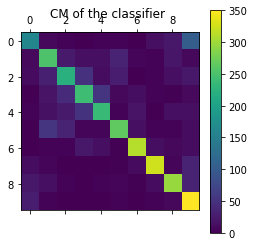

In [67]:
benchmark(MultinomialNB,best_params_nb )

Looks decent and results could be improved with nlp techniques such as proper preprocessing, stop words removal
or other algos. But this is okay for our experiements

#### For just one classifier with one vectorizer, the performance of GridSearch and RandomSearch are nearly the same.

### But there are many other classifiers with their own parameters ?
### We could even use a different vectorizer ( count, tf-idf, hashing with its own parameters)

# THE ANSWER IS BUILDING A PIPELINE AND DO A GRIDSEARCH ON THEM

##### Simple example pipeline to to a classifier, its parameters, vectorizer and GridSearchCV
##### lets do this again with 4 categories for time saving

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [69]:
# Load 2 categories and get train and test data

categories = ['alt.atheism', 'rec.sport.baseball']
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, 
                                  remove=('headers', 'footers', 'quotes'), categories= categories)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, remove=('headers', 'footers', 'quotes'),
                                 categories=categories)

y_train = twenty_train.target
y_test = twenty_test.target

In [70]:
# Lets initialize a pipeline

In [81]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

class DummyTransformer(TransformerMixin):
    def fit_transform(self, X, y=None, **fit_params): pass
    def fit(self): pass
    def tranform(self): pass

pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', DummyEstimator()),
])

# A fit transform followed by an estimator

search_space = [
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (LogisticRegression(),),
        'clf__C': ( 0.1, 1, 10),
        'clf__penalty': ('l2', 'l1'),
    }, 
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (RandomForestClassifier(),),
        'clf__n_estimators': (10,20,30,50),
        'clf__max_depth': (5,10,20),
    },
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (DecisionTreeClassifier(),),
        'clf__max_depth': (1,5,10,25,50),
    }, 
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (MultinomialNB(),),
        'clf__alpha': (0.01,0.1, 1.0, 10, 100),
    }   
]



In [82]:
gs_clf = GridSearchCV(pipeline, search_space, cv=5, verbose=1)

In [83]:
gs_clf.fit(twenty_train.data, twenty_train.target)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [84]:
gs_clf.best_params_
# {'clf__C': 0.1}

gs_clf.best_score_
# 0.702290076336

print (f" best estimator is {gs_clf.best_params_} and score is {gs_clf.best_score_}")

 best estimator is {'clf': MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), 'clf__alpha': 0.01, 'vect': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None), 'vect__max_df': 0.5} and score is 0.9591457753017641


In [33]:
# You can add even more parameters and search your classifiers with even more vectorizers like below

In [85]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', DummyEstimator()),
])

# A fit transform followed by an estimator

search_space = [
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (LogisticRegression(),),
        'clf__C': ( 0.1, 1, 10),
        'clf__penalty': ('l2', 'l1'),
    }, 
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (RandomForestClassifier(),),
        'clf__n_estimators': (10,20,30,50),
        'clf__max_depth': (5,10,20),
    },
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (DecisionTreeClassifier(),),
        'clf__max_depth': (1,5,10,25,50),
    }, 
    {
        'vect': (TfidfVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (MultinomialNB(),),
        'clf__alpha': (0.01,0.1, 1.0, 10, 100),
    },
        {
        'vect': (CountVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (LogisticRegression(),),
        'clf__C': ( 0.1, 1, 10),
        'clf__penalty': ('l2', 'l1'),
    }, 
    {
        'vect': (CountVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (RandomForestClassifier(),),
        'clf__n_estimators': (10,20,30,50),
        'clf__max_depth': (5,10,20),
    },
    {
        'vect': (CountVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (DecisionTreeClassifier(),),
        'clf__max_depth': (1,5,10,25,50),
    }, 
    {
        'vect': (CountVectorizer(),),
        'vect__max_df': (0.5, 0.75),
        'clf': (MultinomialNB(),),
        'clf__alpha': (0.01,0.1, 1.0, 10, 100),
    }
    
]



In [86]:
gs_clf = GridSearchCV(pipeline, search_space, cv=5, verbose=1)
gs_clf.fit(twenty_train.data, twenty_train.target)
print (f" best estimator is {gs_clf.best_params_} and score is {gs_clf.best_score_}")

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

 best estimator is {'clf': MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True), 'clf__alpha': 0.01, 'vect': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None), 'vect__max_df': 0.5} and score is 0.9591457753017641


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  1.9min finished


# Next More into pipelines, base estimator and transformer classes

In [36]:
# Before that Practise pipeline with GridSearch on iris dataset